In [1]:
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
# Perform following tasks:
# 1. Pre-process the dataset.
# 2. Identify outliers.
# 3. Check the correlation.
# 4. Implement linear regression and random forest regression models.
# 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
# Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb


dataset = pd.read_csv('uber.csv')


In [20]:
dataset.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [21]:
dataset.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [23]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["CT"])
    W = Q[Q.CT > 0].index
    for i in W:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [24]:
replacer(dataset)

In [25]:
dataset.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [26]:
def outliers(A,ft):
    Q1 = A[ft].quantile(0.25)
    Q3 = A[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ls = A.index[ (A[ft] < lower_bound) | (A[ft] > upper_bound) ]
    return ls

In [27]:
dataset.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [28]:
A = dataset.head(50)

In [63]:
Y = A[["fare_amount"]]
X = A.drop(labels=["fare_amount"],axis=1)

In [65]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
X1 = pd.get_dummies(X[cat])
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X3 = X2.join(X1)


In [66]:
xnew = pd.DataFrame(X3)

In [67]:
index_list = []

for i in con:
    index_list.extend(outliers(X3,i))


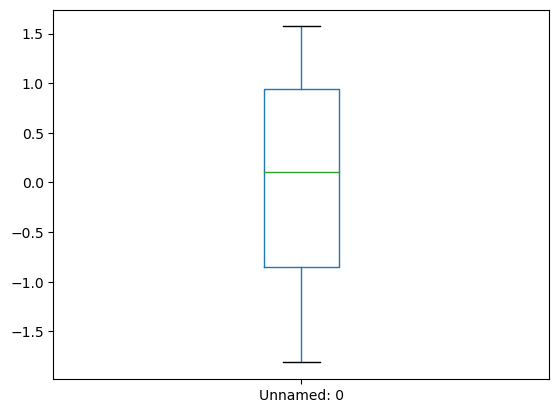

In [69]:
def plot_boxplot(xnew,ft):
    xnew.boxplot(column =[ft])
    plt.grid(False)
    plt.show()

plot_boxplot(xnew,'Unnamed: 0')

# fare_amount
# xnew

In [70]:
X3.corr()

,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,key_2009-01-10 22:43:36.0000007,key_2009-02-12 17:52:18.0000001,key_2009-02-19 08:28:42.0000001,key_2009-02-28 15:54:57.0000002,...,pickup_datetime_2014-02-18 14:26:00 UTC,pickup_datetime_2014-04-02 14:58:32 UTC,pickup_datetime_2014-06-04 06:49:00 UTC,pickup_datetime_2014-08-28 17:47:00 UTC,pickup_datetime_2014-10-12 07:04:00 UTC,pickup_datetime_2015-01-04 09:17:47 UTC,pickup_datetime_2015-03-03 23:15:03 UTC,pickup_datetime_2015-03-25 08:58:35 UTC,pickup_datetime_2015-05-07 19:52:06 UTC,pickup_datetime_2015-05-22 17:32:27 UTC
Unnamed: 0,1.000000,-0.065195,0.065876,-0.064761,0.065955,0.045267,-0.237150,0.172913,0.100186,-0.167393,...,0.224500,-0.123847,-0.100028,-0.115141,0.166859,-0.078118,-0.185530,0.170916,-0.055072,-0.254756
pickup_longitude,-0.065195,1.000000,-0.999993,0.999998,-0.999993,-0.116590,-0.029329,-0.029249,-0.029161,-0.029427,...,-0.029189,-0.029092,-0.027298,-0.028647,-0.029006,-0.029184,-0.029280,-0.029017,-0.029384,-0.029134
pickup_latitude,0.065876,-0.999993,1.000000,-0.999994,0.999993,0.117633,0.029144,0.029250,0.029645,0.028459,...,0.029050,0.029390,0.027193,0.029016,0.028119,0.028716,0.028749,0.029429,0.028913,0.029067
dropoff_longitude,-0.064761,0.999998,-0.999994,1.000000,-0.999991,-0.116820,-0.029392,-0.029174,-0.029118,-0.029294,...,-0.029443,-0.029042,-0.028079,-0.029144,-0.028140,-0.029260,-0.029284,-0.029157,-0.029404,-0.029296
dropoff_latitude,0.065955,-0.999993,0.999993,-0.999991,1.000000,0.117627,0.028946,0.029594,0.029189,0.028601,...,0.029220,0.029490,0.028617,0.029248,0.029481,0.029237,0.028521,0.029116,0.028568,0.028686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pickup_datetime_2015-01-04 09:17:47 UTC,-0.078118,-0.029184,0.028716,-0.029260,0.029237,-0.082251,-0.020408,-0.020408,-0.020408,-0.020408,...,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,1.000000,-0.020408,-0.020408,-0.020408,-0.020408
pickup_datetime_2015-03-03 23:15:03 UTC,-0.185530,-0.029280,0.028749,-0.029284,0.028521,0.025974,-0.020408,-0.020408,-0.020408,-0.020408,...,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,1.000000,-0.020408,-0.020408,-0.020408
pickup_datetime_2015-03-25 08:58:35 UTC,0.170916,-0.029017,0.029429,-0.029157,0.029116,-0.082251,-0.020408,-0.020408,-0.020408,-0.020408,...,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,1.000000,-0.020408,-0.020408
pickup_datetime_2015-05-07 19:52:06 UTC,-0.055072,-0.029384,0.028913,-0.029404,0.028568,-0.082251,-0.020408,-0.020408,-0.020408,-0.020408,...,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,-0.020408,1.000000,-0.020408


In [61]:
sb.heatmap(X3.corr())

<AxesSubplot:>

In [74]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X3,Y,test_size=0.2,random_state=21)


In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [76]:
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

3.7508524511655246

In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [90]:
model2 = rf.fit(xtrain,ytrain)
pred = model2.predict(xtest)
RandomForestRegressor(pred)

/var/folders/x5/kcsf7m6131lg028fwqqfszqw0000gn/T/ipykernel_5199/945725248.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2 = rf.fit(xtrain,ytrain)


RandomForestRegressor(n_estimators=array([19.882,  7.084,  6.671, 10.748, 10.327,  8.462,  6.957,  5.761,
        6.197,  6.734]))

In [92]:
y_pred =rf.predict(xtest)
y_pred

array([19.882,  7.084,  6.671, 10.748, 10.327,  8.462,  6.957,  5.761,
        6.197,  6.734])

In [93]:
from sklearn.metrics import r2_score
r2_score(ytest,y_pred) # random forest regressor

-2.69329832450526

In [96]:
r2_score(ytest,pred) # linear regressor

-2.69329832450526

In [98]:
from sklearn.metrics import  mean_squared_error
mean_squared_error(ytest,y_pred) # random forest regressor

40.1624033

In [99]:
mean_squared_error(ytest,pred) # linear regrassion

40.1624033